In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
# Load the dataset
dataset_path = '../data/raw/default_of_credit_card_clients.xls'
data = pd.read_excel(dataset_path, header=1)


# Convert specific columns to categorical types
categorical_cols = [
    'SEX', 'EDUCATION', 'MARRIAGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'default payment next month'
]

target = 'default payment next month'

for col in categorical_cols:
    data[col] = data[col].astype('category')
data['ID'] = data['ID'].astype(str)

# Map categorical codes to labels and replace unknown values with nan
data['SEX'] = data['SEX'].map({1: 'male', 2: 'female'}).astype('category')

data['EDUCATION'] = data['EDUCATION'].map({
    1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others',
    5: np.nan, 6: np.nan, 0: np.nan
}).astype('category')

data['MARRIAGE'] = data['MARRIAGE'].map({
    1: 'married', 2: 'single', 3: 'divorce',
    0: np.nan
}).astype('category')


# Set a specific order for categorical variables
education_order = ['graduate school', 'high school', 'university', 'others']
data['EDUCATION'] = data['EDUCATION'].cat.reorder_categories(education_order, ordered=True)

# For MARRIAGE
marriage_order = ['single', 'married', 'divorce']
data['MARRIAGE'] = data['MARRIAGE'].cat.reorder_categories(marriage_order, ordered=True)




# Display the first few rows of the dataset
print(pay_cols)
print(data.head())
print(pay_cols)
print("Types: ", data.dtypes)

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
  ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE PAY_0 PAY_2 PAY_3 PAY_4  \
0  1      20000  female  university  married   24     2     2    -1    -1   
1  2     120000  female  university   single   26    -1     2     0     0   
2  3      90000  female  university   single   34     0     0     0     0   
3  4      50000  female  university  married   37     0     0     0     0   
4  5      50000    male  university  married   57    -1     0    -1     0   

   ... BILL_AMT4 BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0  ...         0         0          0         0       689         0         0   
1  ...      3272      3455       3261         0      1000      1000      1000   
2  ...     14331     14948      15549      1518      1500      1000      1000   
3  ...     28314     28959      29547      2000      2019      1200      1100   
4  ...     20940     19146      19131      2000     36681     10000      9000

In [66]:
# Check for missing values and unique values
print("Missing values: ", data.isnull().sum())

Missing values:  ID                              0
LIMIT_BAL                       0
SEX                             0
EDUCATION                     345
MARRIAGE                        0
AGE                             0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64


Analysis of Categorical Variables

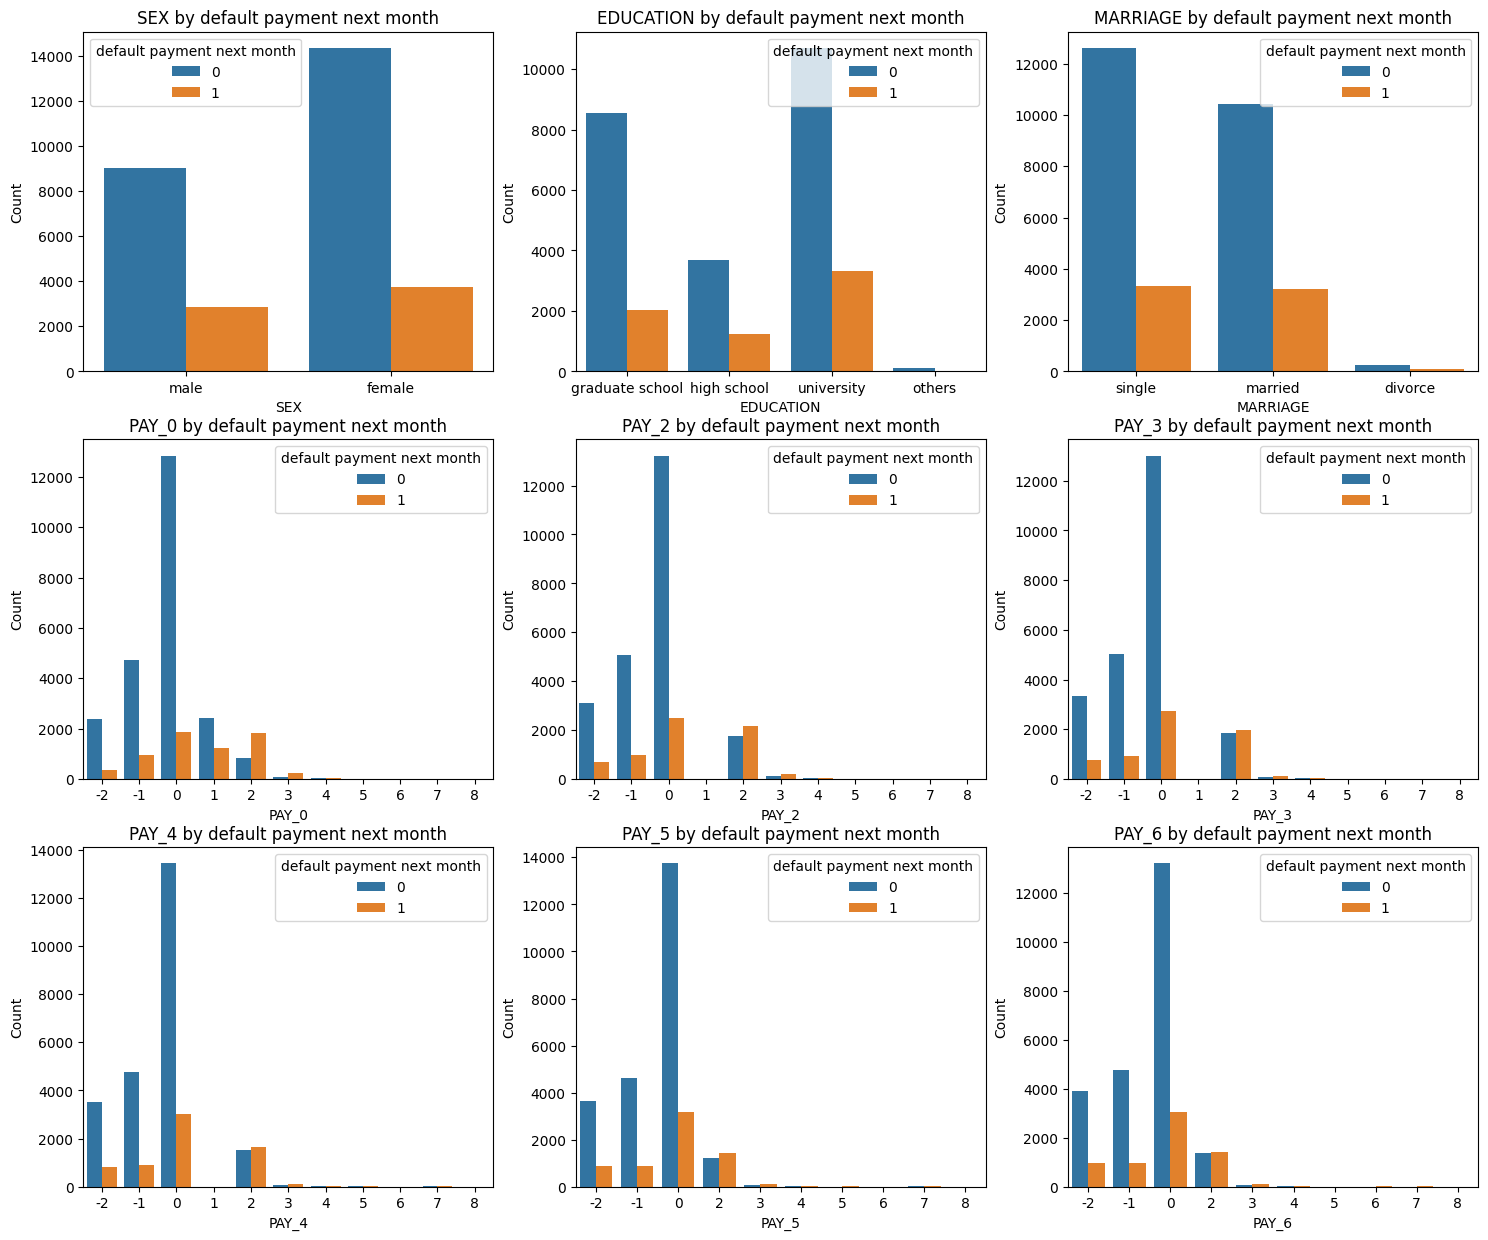

In [71]:
# Panel of categorical variable distributions by target

target = 'default payment next month'
categorical_cols = [col for col in data.select_dtypes(include='category').columns if col != target]

n_cols = 3
n_rows = int(np.ceil(len(categorical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))

for idx, col in enumerate(categorical_cols):
    ax = axes[idx // n_cols, idx % n_cols]
    sns.countplot(x=col, hue=target, data=data, ax=ax)
    ax.set_title(f'{col} by {target}')
    ax.legend(title=target)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Remove empty subplots if any
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

In [73]:
# Analysis of Categorical Variables with respect to the target

target = 'default payment next month'
categorical_cols = [col for col in data.select_dtypes(include='category').columns if col != target]

for col in categorical_cols:
    print(f"--- {col} ---")
    print("Counts:\n", data[col].value_counts(dropna=False))
    print("Proportions:\n", data[col].value_counts(normalize=True, dropna=False))
    print("Unique values:", data[col].unique())
    print("\n")
    

--- SEX ---
Counts:
 SEX
female    18112
male      11888
Name: count, dtype: int64
Proportions:
 SEX
female    0.603733
male      0.396267
Name: proportion, dtype: float64
Unique values: ['female', 'male']
Categories (2, object): ['male', 'female']


--- EDUCATION ---
Counts:
 EDUCATION
university         14030
graduate school    10585
high school         4917
NaN                  345
others               123
Name: count, dtype: int64
Proportions:
 EDUCATION
university         0.467667
graduate school    0.352833
high school        0.163900
NaN                0.011500
others             0.004100
Name: proportion, dtype: float64
Unique values: ['university', 'graduate school', 'high school', NaN, 'others']
Categories (4, object): ['graduate school' < 'high school' < 'university' < 'others']


--- MARRIAGE ---
Counts:
 MARRIAGE
single     15964
married    13659
divorce      323
NaN           54
Name: count, dtype: int64
Proportions:
 MARRIAGE
single     0.532133
married    0.455300
divor

In [74]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    contingency = pd.crosstab(data[col], data[target])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f}")

SEX: p-value = 0.0000
EDUCATION: p-value = 0.0000
MARRIAGE: p-value = 0.0000
PAY_0: p-value = 0.0000
PAY_2: p-value = 0.0000
PAY_3: p-value = 0.0000
PAY_4: p-value = 0.0000
PAY_5: p-value = 0.0000
PAY_6: p-value = 0.0000


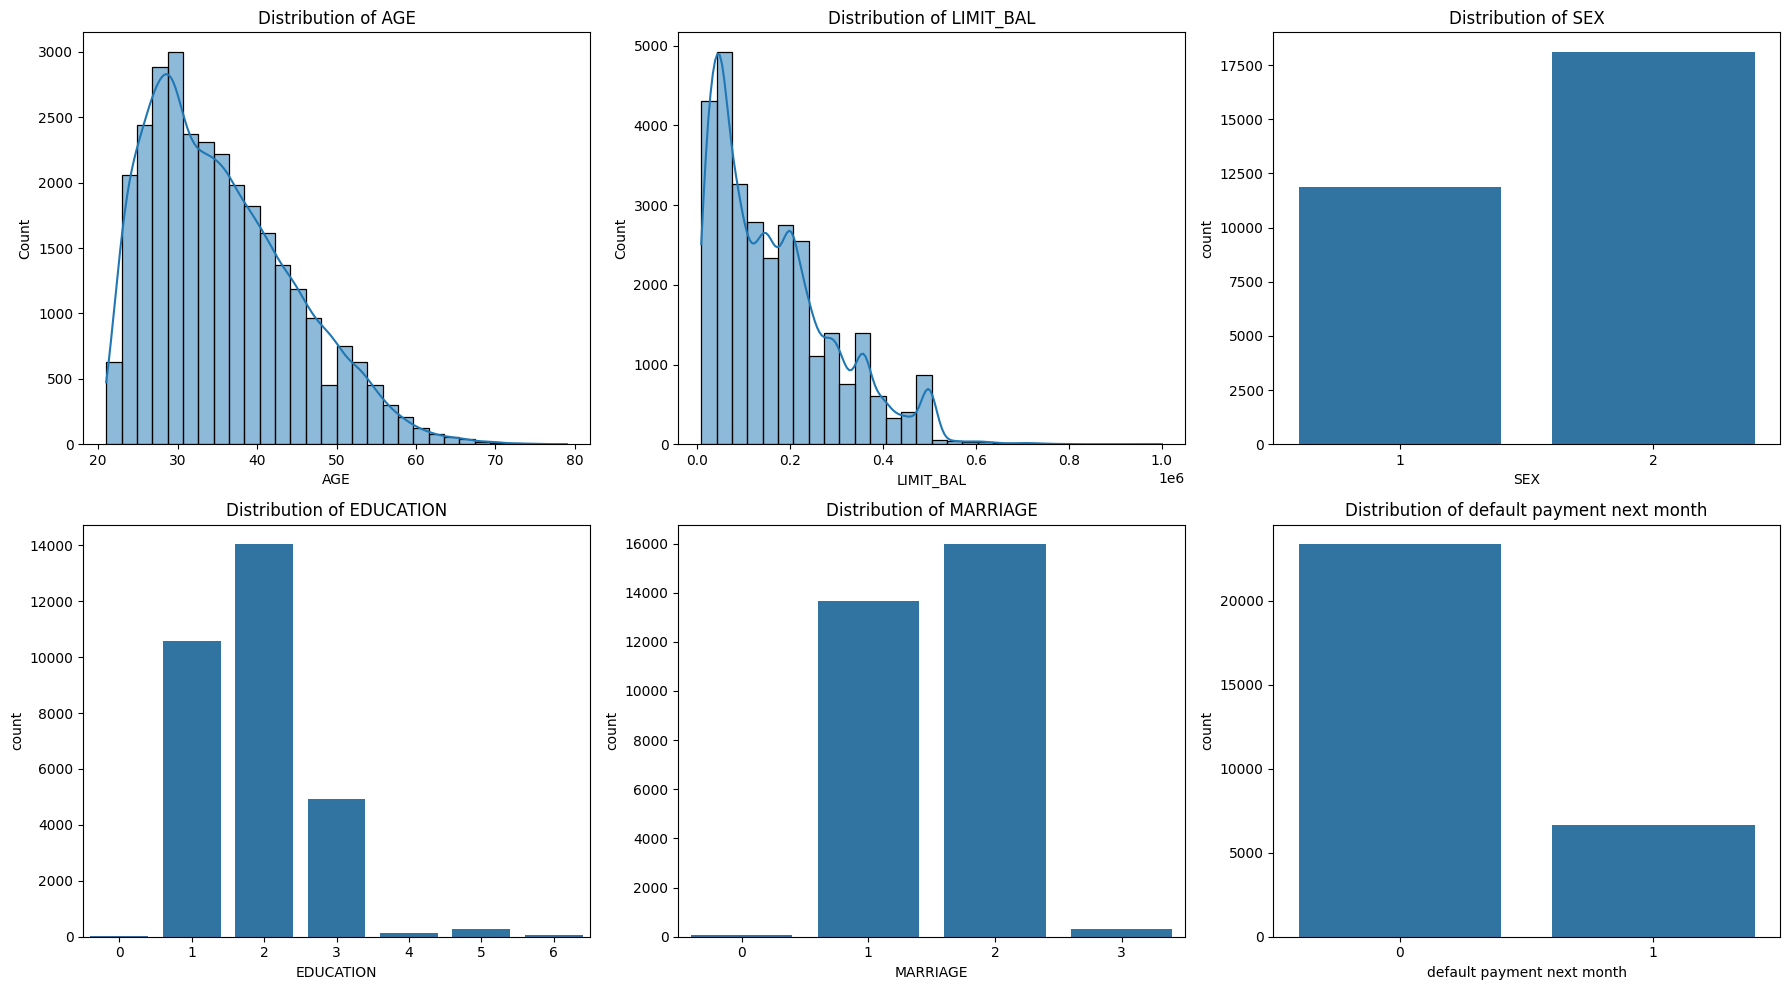

In [34]:

# List of features to plot
features = ['AGE', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    if str(data[feature].dtype) == 'category' or data[feature].nunique() < 10:
        sns.countplot(x=feature, data=data, ax=ax)
    else:
        sns.histplot(data[feature], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()